In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")   
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [5]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42,
    class_weight='balanced',
    oob_score=True
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [6]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]


In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.85


In [8]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



In [9]:
print("OOB Score:", rf.oob_score_)


OOB Score: 0.8451882845188284


In [10]:
cv_scores = cross_val_score(
    rf, X, y, cv=5, scoring='f1'
)

print("Cross-validation F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())


Cross-validation F1 scores: [0.54054054 0.73684211 0.72222222 0.16666667 0.        ]
Mean F1 score: 0.4332543069385174


time                        0.370164
serum_creatinine            0.158901
ejection_fraction           0.137579
creatinine_phosphokinase    0.074442
platelets                   0.070673
age                         0.069319
serum_sodium                0.060315
anaemia                     0.012931
diabetes                    0.012514
smoking                     0.012053
high_blood_pressure         0.011384
sex                         0.009726
dtype: float64


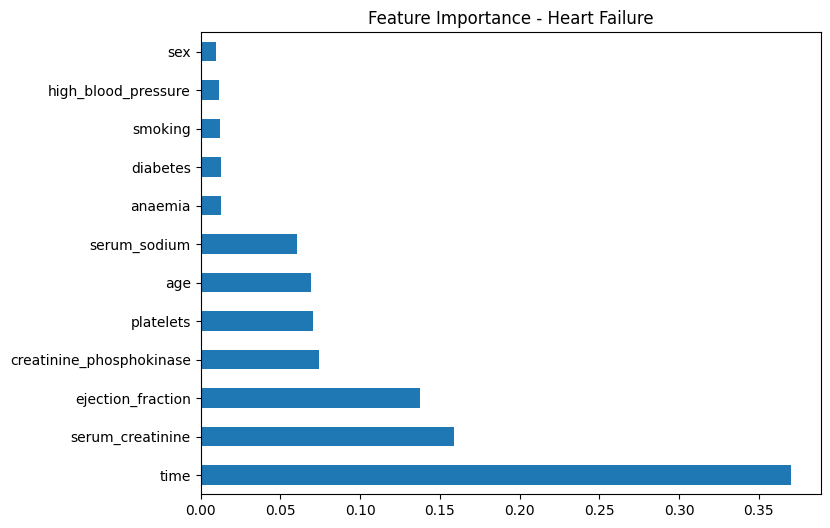

In [11]:
importances = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

print(importances)

importances.plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - Heart Failure")
plt.show()
